<div style="text-align: center; background-color: #ADD8E6; font-family: 'Times New Roman', serif; color: white; padding: 20px; font-size: 30px; font-weight: bold; border-radius: 10px; box-shadow: 0px 6px 15px rgba(0, 0, 0, 0.2); transition: all 0.3s ease;">
    THE ANALYSIS OF THE MOBILE PHONE MARKET AT MOBILE CITY STORE
</div>
<style>
    div:hover {
        transform: scale(1.05);
        box-shadow: 0px 10px 20px rgba(0, 0, 0, 0.3);
    }
</style>


---

<div style="text-align: center; background-color: #ADD8E6; font-family: 'Times New Roman', serif; color: white; padding: 25px; font-size: 20px; font-weight: bold; border-radius: 10px; box-shadow: 0px 6px 15px rgba(0, 0, 0, 0.2); transition: all 0.3s ease;">
    DATA ANALYZING
</div>
<style>
    div:hover {
        opacity: 0.8;
    }
</style>

---

# Thư viện

In [1]:
# Import các thư viện cần thiết
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import ast
import re

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# Sử dụng data đã được xử lý

In [ ]:
# Đọc file csv
data = pd.read_csv('../data/processed_data.csv', index_col=0)

# Chuyển đổi object thành list
data["do_phan_giai_cam_truoc"] = data["do_phan_giai_cam_truoc"].apply(ast.literal_eval)
data["do_phan_giai_cam_sau"] = data["do_phan_giai_cam_sau"].apply(ast.literal_eval)

data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
Index: 8855 entries, 0 to 8854
Data columns (total 26 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ten                     8855 non-null   object 
 1   loai_dien_thoai         8855 non-null   object 
 2   thoi_gian_bao_hanh      8855 non-null   float64
 3   danh_gia                8855 non-null   float64
 4   so_luong_binh_luan      8855 non-null   int64  
 5   duong_dan               8855 non-null   object 
 6   mau_sac                 8576 non-null   object 
 7   gia_moi                 7347 non-null   float64
 8   gia_cu                  5158 non-null   float64
 9   he_dieu_hanh            8855 non-null   object 
 10  cpu                     8840 non-null   object 
 11  ram                     8838 non-null   float64
 12  bo_nho_trong            8536 non-null   float64
 13  dung_luong_pin          8655 non-null   float64
 14  thiet_ke                8739 non-null   objec

,ten,loai_dien_thoai,thoi_gian_bao_hanh,danh_gia,so_luong_binh_luan,duong_dan,mau_sac,gia_moi,gia_cu,he_dieu_hanh,cpu,ram,bo_nho_trong,dung_luong_pin,thiet_ke,hang_dien_thoai,la_dien_thoai_cu,kich_thuoc_man_hinh,tan_so_quet,do_sang_man_hinh,loai_man_hinh,so_the_sim,loai_pin,cong_suat_sac,do_phan_giai_cam_sau,do_phan_giai_cam_truoc
0,Điện thoại Xiaomi Redmi 12C (Helio G85),Redmi,12.0,5.0,7,https://mobilecity.vn/dien-thoai/xiaomi-redmi-...,Xanh Đậm,1650000.0,2950000.0,Android 12,Mediatek MT6769Z Helio G85 (12nm)\n8 nhân (2x2...,4.0,64.0,5000.0,Thanh + Cảm ứng,Xiaomi,False,6.71,NaN,500.0,LCD,2,Li-Po,10.0,"[50.0, 0.08]",[5.0]
1,Điện thoại Xiaomi Redmi 12C (Helio G85),Redmi,12.0,5.0,7,https://mobilecity.vn/dien-thoai/xiaomi-redmi-...,Xanh Đậm,1950000.0,2950000.0,Android 12,Mediatek MT6769Z Helio G85 (12nm)\n8 nhân (2x2...,4.0,128.0,5000.0,Thanh + Cảm ứng,Xiaomi,False,6.71,NaN,500.0,LCD,2,Li-Po,10.0,"[50.0, 0.08]",[5.0]
2,Điện thoại Xiaomi Redmi 12C (Helio G85),Redmi,12.0,5.0,7,https://mobilecity.vn/dien-thoai/xiaomi-redmi-...,Xanh bạc hà,1650000.0,2950000.0,Android 12,Mediatek MT6769Z Helio G85 (12nm)\n8 nhân (2x2...,4.0,64.0,5000.0,Thanh + Cảm ứng,Xiaomi,False,6.71,NaN,500.0,LCD,2,Li-Po,10.0,"[50.0, 0.08]",[5.0]
3,Điện thoại Xiaomi Redmi 12C (Helio G85),Redmi,12.0,5.0,7,https://mobilecity.vn/dien-thoai/xiaomi-redmi-...,Xanh bạc hà,1950000.0,2950000.0,Android 12,Mediatek MT6769Z Helio G85 (12nm)\n8 nhân (2x2...,4.0,128.0,5000.0,Thanh + Cảm ứng,Xiaomi,False,6.71,NaN,500.0,LCD,2,Li-Po,10.0,"[50.0, 0.08]",[5.0]
4,Điện thoại Xiaomi Redmi 12C (Helio G85),Redmi,12.0,5.0,7,https://mobilecity.vn/dien-thoai/xiaomi-redmi-...,Tím,1650000.0,2950000.0,Android 12,Mediatek MT6769Z Helio G85 (12nm)\n8 nhân (2x2...,4.0,64.0,5000.0,Thanh + Cảm ứng,Xiaomi,False,6.71,NaN,500.0,LCD,2,Li-Po,10.0,"[50.0, 0.08]",[5.0]


# Câu hỏi: Mức giá giảm có ảnh hưởng đến lượt đánh giá và mức độ hài lòng của khách hàng không?

## Mục đích
- Đánh giá tác động của giá cả đến hành vi tiêu dùng của khách hành để tìm ra những chiến thuật kinh doanh tốt nhất.
- Đưa ra các quyết định kinh doanh thông minh dựa trên dữ liệu đã được xử lý


## Tiền xử lý

In [3]:
df = data[["gia_cu", "gia_moi", "so_luong_binh_luan"]].copy().dropna()

# Tính toán mức giá giảm = Gía cũ - Gía mới
df['Mức giá giảm'] = df['gia_cu'] - df['gia_moi']
df['Có giảm giá'] = df['Mức giá giảm'] > 0

## Trực quan hóa và nhận xét

### Kiểm tra phân phối dữ liệu của mức giá giảm

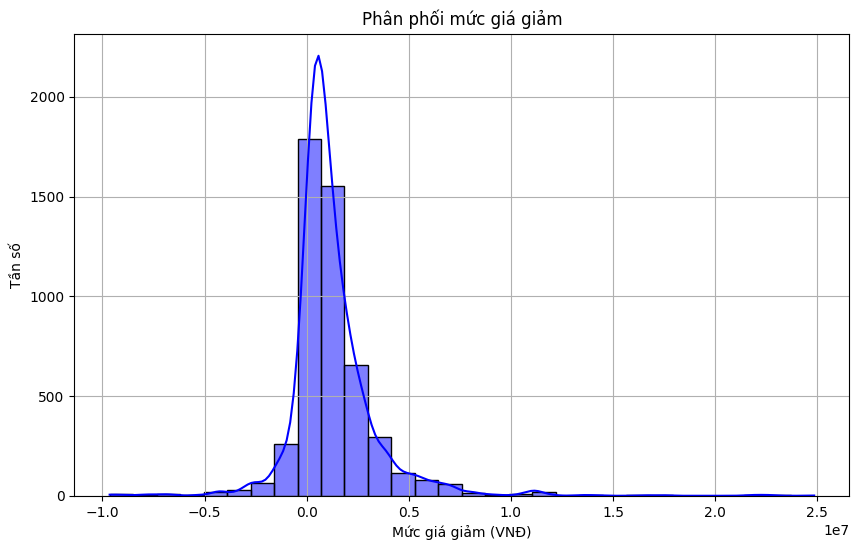

In [4]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Mức giá giảm'], kde=True, bins=30, color='blue')
plt.title("Phân phối mức giá giảm")
plt.xlabel("Mức giá giảm (VNĐ)")
plt.ylabel("Tần số")
plt.grid()
plt.show()

**Nhận xét chart**
- Biểu đồ histogram cho thấy `Mức giá giảm` chủ yếu tập trung gần giá trị 0, với 1 ít sản phẩm có mức giá giửm lớn hơn nhưng lại không đáng kể.
- Điều này cho thấy rằng hầu hết các sản phẩm không có mức giảm giá quá lớn

### Phân tích nhóm (Có giảm giá vss Không giảm giá)

/tmp/ipykernel_23899/3667729048.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Có giảm giá', y='so_luong_binh_luan', data=df, palette='Set2')


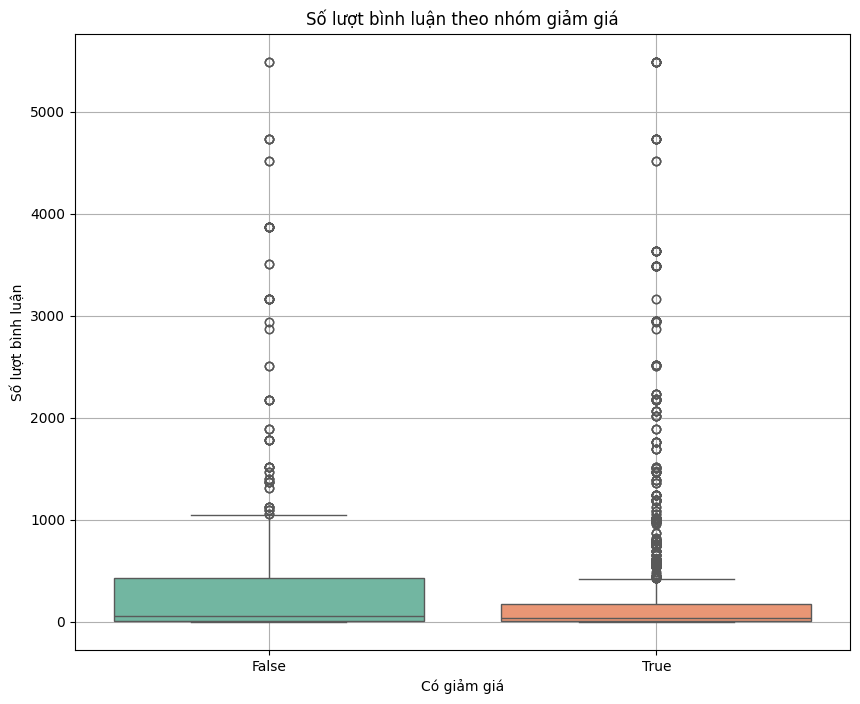

In [5]:
group_means = df.groupby('Có giảm giá')['so_luong_binh_luan'].mean()

plt.figure(figsize=(10, 8))
sns.boxplot(x='Có giảm giá', y='so_luong_binh_luan', data=df, palette='Set2')
plt.title("Số lượt bình luận theo nhóm giảm giá")
plt.xlabel("Có giảm giá")
plt.ylabel("Số lượt bình luận")
plt.grid()
plt.show()

**Nhận xét chart**
- Biểu đồ trên ta có thể thấy không có sự khác biệt quá lớn giữa số lượt bình luật của 2 nhóm (có giảm giá và không giảm giá)
- Các giá trị ngoại lai (outliers) của nhóm không giảm giá có phạm vi phân bố rộng hơn 


### Hồi quy tuyến tính

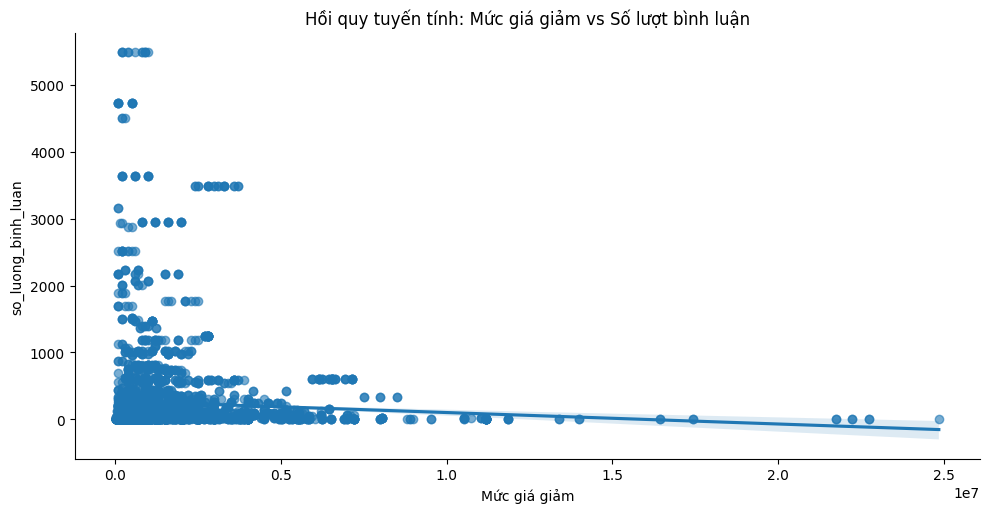

Hệ số tương quan: -0.06534300391735282


In [6]:
df_true = df[df['Mức giá giảm'] > 0] 
sns.lmplot(x='Mức giá giảm', y='so_luong_binh_luan', data=df_true, aspect=2, scatter_kws={'alpha': 0.6})
plt.title("Hồi quy tuyến tính: Mức giá giảm vs Số lượt bình luận")
plt.show()

#Hệ số tương quan
correlation = df['Mức giá giảm'].corr(df['so_luong_binh_luan'])
print(f'Hệ số tương quan: {correlation}')

**Nhận xét chart**
- Hệ số tương quan giữa `Mức giá giảm` và `Số lượt đánh giá` là -0.0063 rất gần với 0.
- Từ hệ số tương quan ta có thể kết luận là hầu như không có mối tương quan tuyến tính giữa 2 thuộc tính này. Có thể là do `Mức giá giảm` không phải là yếu tố then chốt ảnh hưởng đến `Số lượng đánh giá`
- Đường hồi quy gần như phẳng, thể hiện mối quan hệ yếu giữa 2 thuộc tính này hoặc không tồn tại
- Số lượt đánh giá (5000+) rải rác không đồng đều và có thể thấy nó khong phụ thuộc rõ ràng vào mức giá giảm

### Kết luận
- Không có sự khác biệt ý nghĩa về số lượt bình luận giữa các sản phẩm có giảm giá và không giảm giá.
- Mức giảm giá không phải là yếu tố chính tác động đến số lượt bình luận cũng như sự hài lòng cảu khác hàng

# Câu hỏi: Thời gian bảo hành có ảnh hưởng đến sự hài lòng của khách hàng không?

## Mục đích
- Để làm rõ xem mối liên quan giữa thời gian bảo hành và điểm đánh giá
- Tìm kiếm chiến lược kinh doanh thông minh giựa trên những đúc kết tính toán. Nếu thời gian bảo hành có tác động đến điểm đánh gái thì doanh nghiệp nên cân nhắc điều chỉnh chính sách bảo hành của mình để nâng cao sự hài lòng cũng như trung thành của khách hàng.

## Tiền xử lý

In [7]:
df = data[["thoi_gian_bao_hanh", "danh_gia"]].copy().dropna()

# Tính trung bình đánh giá theo 'Thời gian bảo hành (tháng)'
mean_satisfaction = df.groupby('thoi_gian_bao_hanh')['danh_gia'].mean()
mean_satisfaction


thoi_gian_bao_hanh
0.0     4.987673
1.0     4.975000
6.0     4.975118
12.0    4.986240
15.0    5.000000
18.0    4.977198
24.0    5.000000
30.0    4.957143
Name: danh_gia, dtype: float64

## Trực quan hóa và nhận xét

### Biểu đồ đường (Thời gian bảo hành vs. Sự hài lòng)

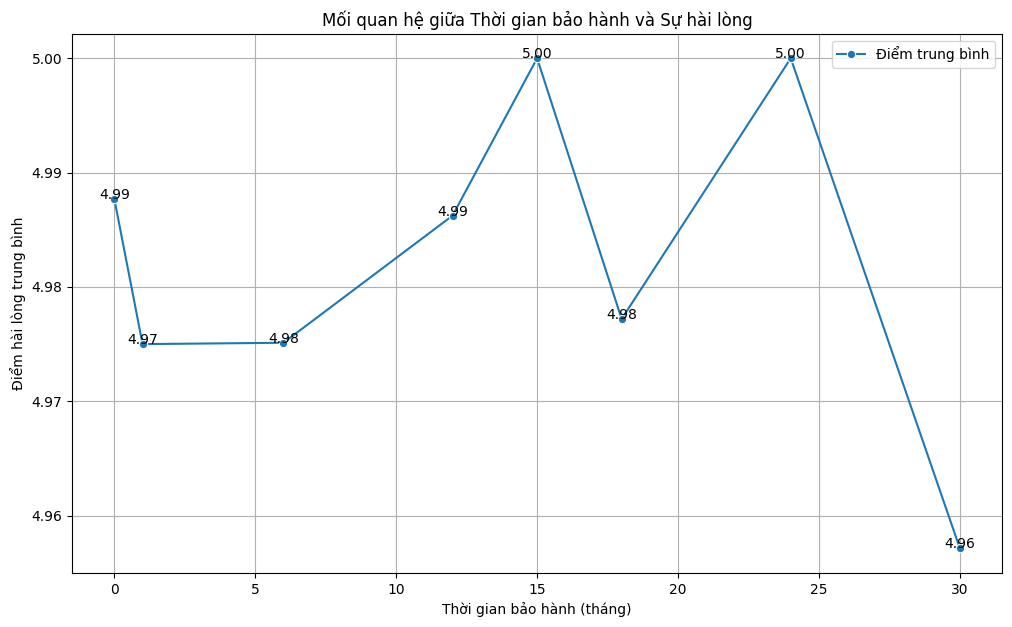

In [ ]:
# Vẽ biểu đồ đường (line plot) để thay thế errorbar
plt.figure(figsize=(12, 7))
sns.lineplot(x=mean_satisfaction.index, y=mean_satisfaction.values, marker='o', label='Điểm trung bình')
plt.title('Mối quan hệ giữa Thời gian bảo hành và Sự hài lòng')
plt.xlabel('Thời gian bảo hành (tháng)')
plt.ylabel('Điểm hài lòng trung bình')
plt.grid()

# Hiển thị các giá trị cụ thể trên biểu đồ
for x, y in zip(mean_satisfaction.index, mean_satisfaction.values):
    plt.text(x, y, f'{y:.2f}', fontsize=10, ha='center', color='black')

plt.legend()
plt.show()


**Nhận xét chart**
- Biểu đồ trên ta thấy không có xu hưỡng rõ ràng giữa thời gian bảo hành và mức độ hài lòng
- Điểm trung bình dao động từ 4.96 đến 5.00, cho thấy sự khác biệt rất nhỏ giữa các mức thời gian bảo hành.
- Biểu đồ đường cho thấy các điểm hài lòng dao động nhẹ ở các mức thời gian bảo hành khác nhau không có xu hướng răng hay giảm rõ ràng. Có thể là do thời gian bảo hành không phải là yếu tổ then chốt đến điểm hài lòng của khác hàng

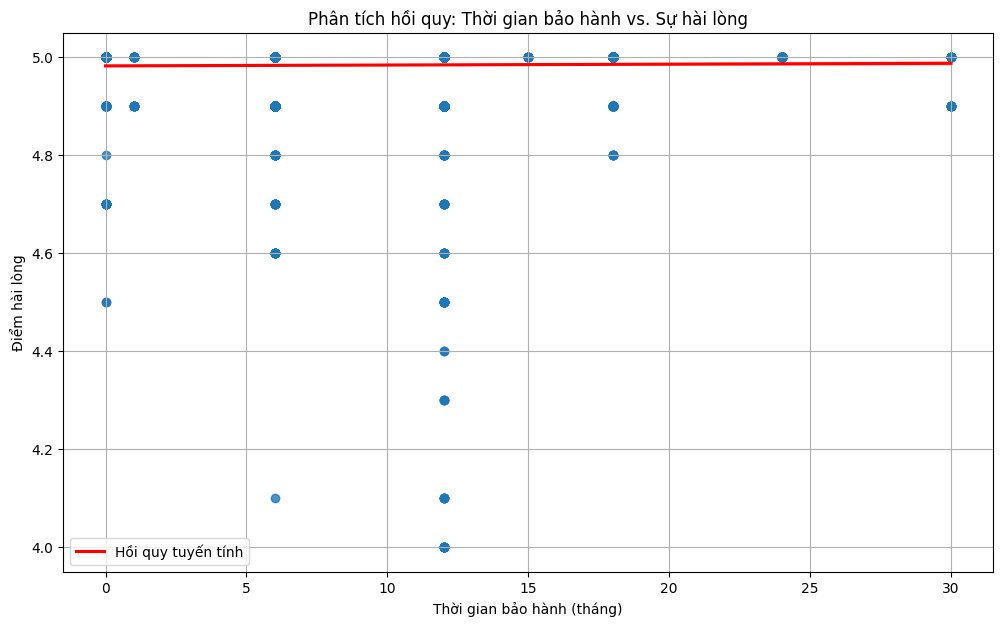

Hệ số tương quan: 0.011327893389531801


In [9]:
# Vẽ biểu đồ hồi quy
plt.figure(figsize=(12, 7))
sns.regplot(x='thoi_gian_bao_hanh', y='danh_gia', data=df, line_kws={'color': 'red', 'label': 'Hồi quy tuyến tính'})
plt.title('Phân tích hồi quy: Thời gian bảo hành vs. Sự hài lòng')
plt.xlabel('Thời gian bảo hành (tháng)')
plt.ylabel('Điểm hài lòng')
plt.legend()
plt.grid()
plt.show()

correlation = data['thoi_gian_bao_hanh'].corr(data['danh_gia'])
print(f'Hệ số tương quan: {correlation}')


**Nhận xét chart**
- Đường hồi quy gần như nằm ngang cho thấy thời gian bảo hành khoongc có liên hệ tuyến tính đnág kể so với sự hài lòng
- Các dữ liệu rải rác xung quanh mức đánh giá cao (gần 5), cho thấy sự ổn định của đánh giá khách hàng bất kể là thời gian bảo hành nào.
- Hệ số tương quan 0.011 rất gần 0. cũng cho thầy không có mối liện hệ giữa thời gian bảo hành và điểm đánh giá

### Kết luận
- Thời gian bảo hành không phải là yếu tố ảnh hưởng đáng kể đến sự hài lòng của khách hàng.


# Câu hỏi: Dòng điện thoại nào được quan tâm nhiều nhất từ trước đến nay dựa trên số lượt đánh giá và hỏi đáp? (Top 10)

## Mục đích

- Tìm hiểu xem trang web `Mobilecity` thu hút được đại đa số lượt tiếp cận sản phẩm của các dòng điện thoại nào.
- Giúp chúng ta nhận định được các dòng điện thoại thu hút sự quan tâm khách hàng, đưa ra được các chiến lược chăm sóc khách hàng hoặc các chiến dịch quảng cáo tập trung vào các dòng điện thoại nổi trội, từ đó nâng cao khả năng tăng doanh số.

## Tiền xử lý

In [ ]:
df = data[["hang_dien_thoai", "so_luong_binh_luan"]].copy().dropna()
df = df.groupby("hang_dien_thoai")["so_luong_binh_luan"].sum().sort_values(ascending=False).to_frame().reset_index().head(10)
df

,hang_dien_thoai,so_luong_binh_luan
0,Xiaomi,801655
1,Realme,202023
2,iPhone,123623
3,Samsung,91940
4,Vivo,91054
5,LG,23341
6,Vsmart,22779
7,Asus,22328
8,OnePlus,17929
9,Nubia,17686


## Trực quan hóa

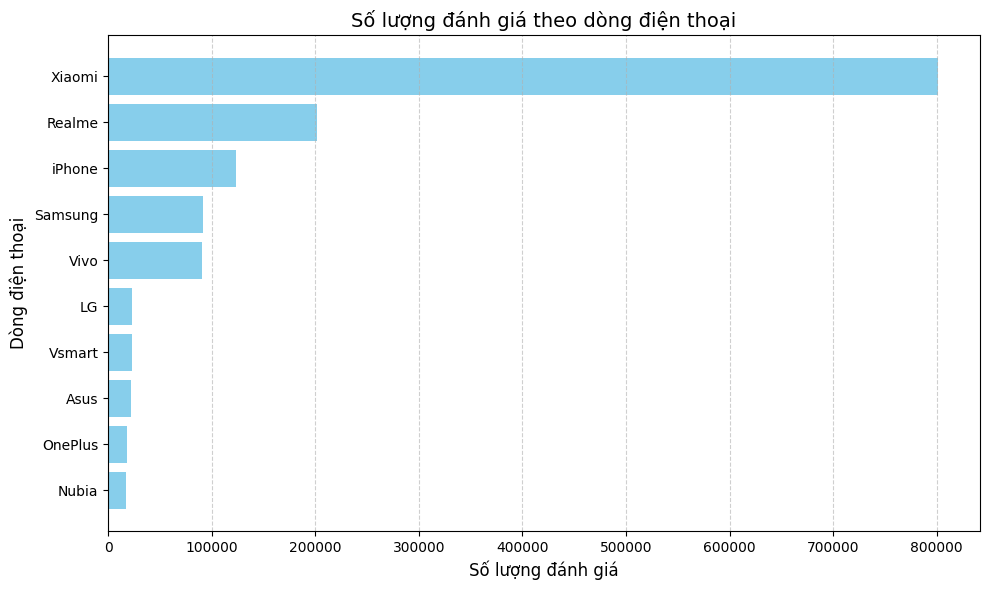

In [11]:
plt.figure(figsize=(10, 6))
plt.barh(df["hang_dien_thoai"], df["so_luong_binh_luan"], color='skyblue')
plt.xlabel('Số lượng đánh giá', fontsize=12)
plt.ylabel('Dòng điện thoại', fontsize=12)
plt.title('Số lượng đánh giá theo dòng điện thoại', fontsize=14)
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.gca().invert_yaxis()  # Invert the y-axis for better visualization
plt.tight_layout()
plt.show()

## Nhận xét

- `Xiaomi` là dòng điện thoại có số lượt đánh giá cao nhất với khoảng 800.000 lượt, cao hơn gần 4 lần so với vị trí thứ 2 là `Realme` (200.000 lượt).
- Xếp theo sau là `Iphone` với khoảng 120.000 lượt.
- `Samsung` và `Vivo` khá ngang bằng nhau với khoảng 90.000 lượt.
- Các dòng còn lại thu hút khá ít lượt đánh giá, khoảng 20.000 lượt cho các dòng `LG`, `Vsmart`, `Asus`, `OnePlus`, `Nubia`.
- **Kết luận**:
    - 5 dòng điện thoại thu hút nhiều lượt đánh giá nhất là `Xiaomi`, `Realme`, `Iphone`, `Samsung`, `Vivo`.
    - Dựa vào thông tin đánh giá của các dòng điện thoại này thì hệ thống cửa hàng sẽ biết được độ hài lòng của khách hàng với các dòng điện thoại hút khách này, từ đó có kế hoạch cải thiện & phát triển chất lượng tiếp thị khách hàng/bảo hành sản phẩm/quảng cáo/...
    - Có thể tập trung nhiều hơn nữa những nguồn lực của cửa hàng để mở rộng khả năng tiếp cận của khách hàng đến với các dòng điện thoại này.

# Câu hỏi: Ứng với mỗi dòng điện thoại thì những mẫu điện thoại nào được quan tâm nhiều nhất? (Top 3)

## Mục đích

- Tìm ra được các mẫu điện thoại thu hút sự quan tâm và phản hồi của khách hàng nhiều nhất ở từng dòng điện thoại của cửa hàng.
- Giúp cửa hàng tập trung xem kết quả đánh giá của các mẫu điện thoại này và liệu rằng nó nhận được phản hồi tốt hay xấu. Từ đó đưa ra kế hoạch điều chỉnh và phát triển phù hợp.

## Tiền xử lý

In [12]:
df = data[["hang_dien_thoai", "so_luong_binh_luan"]].copy().dropna()
df = df.groupby("hang_dien_thoai")["so_luong_binh_luan"].sum().sort_values(ascending=False).to_frame().reset_index().head(10)
brands = df["hang_dien_thoai"].to_list()
df = data[["hang_dien_thoai", "ten", "so_luong_binh_luan"]].copy().drop_duplicates().dropna()
df = (
    df.reset_index()
    .sort_values(["hang_dien_thoai", "so_luong_binh_luan", "ten"], ascending=[False, False, False])
    .groupby("hang_dien_thoai")
    .head(3)
)
df = df[df["hang_dien_thoai"].isin(brands)][["hang_dien_thoai", "so_luong_binh_luan", "ten"]].reset_index(drop=True)
df["order"] = pd.Categorical(df["hang_dien_thoai"], categories=brands, ordered=True).codes + 1
df = df.sort_values("order").reset_index(drop=True).drop(columns="order")
df = df[["hang_dien_thoai", "ten", "so_luong_binh_luan"]]
df.columns = ["Dòng điện thoại", "Tên điện thoại", "Số lượng bình luận"]
df

,Dòng điện thoại,Tên điện thoại,Số lượng bình luận
0,Xiaomi,Điện thoại Xiaomi Redmi K20 Pro (Snap 855),5490
1,Xiaomi,Điện thoại Xiaomi Redmi Note 8 Pro (Helio G90T),4730
2,Xiaomi,Điện thoại Xiaomi Redmi K20,3639
3,Realme,Điện thoại Realme X2 Pro,2870
4,Realme,Điện thoại Realme X (Camera Popup),2934
5,Realme,Điện thoại Realme Q (Realme 5 Pro),4514
6,iPhone,Điện thoại iPhone XS cũ (Chính hãng),1763
7,iPhone,"Điện thoại iPhone 7 Plus Lock Nhật, Mỹ (Dùng n...",1388
8,iPhone,Điện thoại iPhone XR cũ (Chính hãng),1239
9,Samsung,Điện thoại Samsung Galaxy Note 9 cũ (128GB - 5...,805


## Trực quan hóa

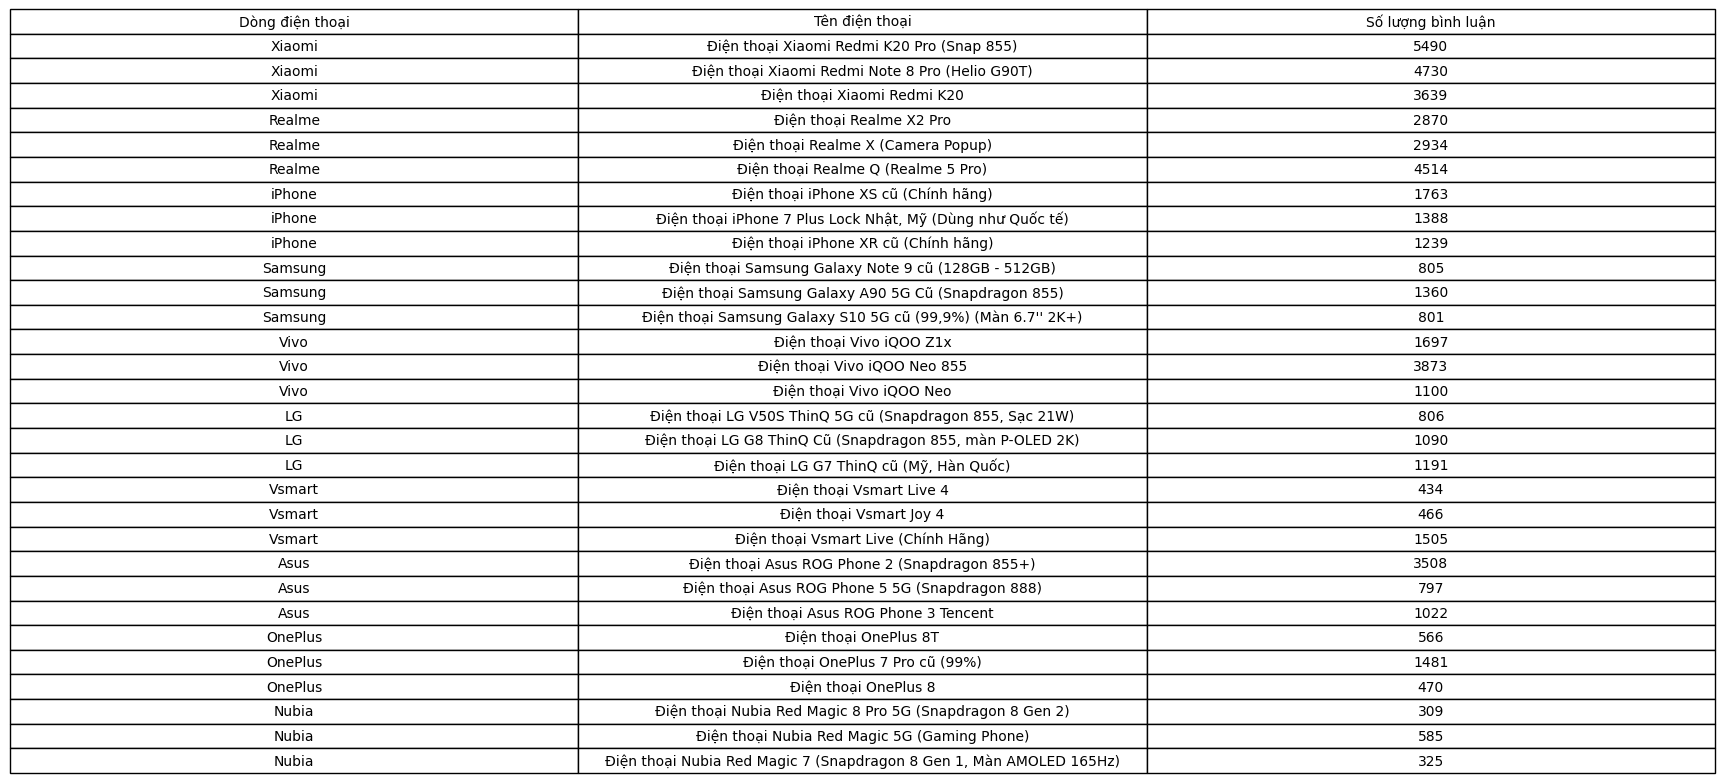

In [13]:
# Adjusting the row height to make the table rows narrower
fig, ax = plt.subplots(figsize=(22, 4))

# Hide axes
ax.axis('tight')
ax.axis('off')

# Create a table with adjusted row heights
table = ax.table(
    cellText=df.values,
    colLabels=df.columns,
    cellLoc='center',
    loc='center'
)

# Set font size and adjust row height
table.auto_set_font_size(False)
table.set_fontsize(10)
for key, cell in table.get_celld().items():
    cell.set_height(0.08)  # Adjust row height

plt.show()


## Nhận xét

- Bảng trên đã tổng hợp top 3 mẫu điện thoại được quan tâm nhiều nhất của từng dòng điện thoại có trên trang web của cửa hàng.
- Từ kết quả này, cửa hàng sẽ tập trung xem các mẫu điện thoại này, xem xem:
    - Các bình luận về mỗi mẫu điện thoại là tích cực hay tiêu cực.
    - Từ đó có thể điều chỉnh chiến lược như bổ sung thêm vào kho hàng cho các mẫu được phản hồi tích cực, đẩy nhanh thanh lý hàng tồn và giảm số lượng nhập mới, hoặc thay đổi kế hoạch tiếp thị/bảo hành/... đối với các mẫu nhận phản hồi tiêu cực.

# Câu hỏi: Trong các thông số kỹ thuật của một chiếc điện thoại, những thông số nào thường có ảnh hưởng lớn nhất đến giá bán?

## Mục đích

**Thông số kỹ thuật** gồm những thông tin chính: màn hình (kích thước, tần số quét, loại màn hình), camera, chip xử lý (CPU), RAM và bộ nhớ, Pin và sạc, hệ điều hành, Thiết kế và chất liệu, ...

Các mục đích chính của việc trả lời câu hỏi:
- **Đối với nhà sản xuất**: Phân tích các yếu tố ảnh hưởng đến giá giúp họ định giá sản phẩm hợp lý, tối ưu hóa thiết kế để tăng sức cạnh tranh trên thị trường.
- **Đối với khách hàng**: Khi hiểu rõ nhu cầu của mình, khách hàng có thể xác định được chiếc điện thoại mong muốn thuộc khoảng giá nào và đánh giá xem số tiền bỏ ra có tương xứng với các tính năng, thông số kỹ thuật của sản phẩm hay không.
- **Đối với tư vấn viên**: Việc nắm rõ thông số kỹ thuật nào ảnh hưởng nhiều đến giá giúp tư vấn viên đưa ra lời khuyên chính xác, giúp khách hàng chọn được sản phẩm phù hợp nhất với yêu cầu của họ.

## Tiền xử lý

> Tạo một DataFrame mới để xử lý nhằm đảm bảo dữ liệu gốc không bị ảnh hưởng.

In [ ]:
data_copy = data.dropna(subset=["gia_moi"]).copy()  # Tạo một copy df nhưng giá trị "gia_moi" không có Nan
data_copy = data_copy[["gia_moi", "he_dieu_hanh", "cpu", "ram", "bo_nho_trong", "dung_luong_pin", "loai_man_hinh", "kich_thuoc_man_hinh", "tan_so_quet", "do_sang_man_hinh", "so_the_sim", "loai_pin", "cong_suat_sac", "do_phan_giai_cam_truoc", "do_phan_giai_cam_sau", "thiet_ke"]]  # Chỉ lấy những thuộc tính thông số kỹ thuật
data_copy.columns = ["Giá", "Hệ điều hành", "CPU", "RAM", "Bộ nhớ trong", "Dung lượng PIN", "Loại màn hình", "Kích thước màn hình", "Tần số quét", "Độ sáng màn hình", "Số thẻ SIM", "Loại PIN", "Công suất sạc", "Độ phân giải camera trước", "Độ phân giải camera sau", "Thiết kế"]   # Đặt lại tên cột
data_copy.info() # Đặt lại tên cột

<class 'pandas.core.frame.DataFrame'>
Index: 7347 entries, 0 to 8800
Data columns (total 16 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Giá                        7347 non-null   float64
 1   Hệ điều hành               7347 non-null   object 
 2   CPU                        7346 non-null   object 
 3   RAM                        7345 non-null   float64
 4   Bộ nhớ trong               7226 non-null   float64
 5   Dung lượng PIN             7176 non-null   float64
 6   Loại màn hình              7175 non-null   object 
 7   Kích thước màn hình        7195 non-null   float64
 8   Tần số quét                5870 non-null   float64
 9   Độ sáng màn hình           4970 non-null   float64
 10  Số thẻ SIM                 7347 non-null   int64  
 11  Loại PIN                   5527 non-null   object 
 12  Công suất sạc              7079 non-null   float64
 13  Độ phân giải camera trước  7347 non-null   object 
 1

> Chuyển đổi các cột có kiểu dữ liệu `category` sang dạng `numerical` để thuận tiện cho việc phân tích, bắt đầu với thuộc tính `Hệ điều hành`.

In [15]:
# Tạo DataFrame mới để xử lý cột "Hệ điều hành" (không có nan)
df = pd.DataFrame({"Hệ điều hành": data_copy["Hệ điều hành"].astype(str).copy()})

# Tách cột "Hệ điều hành" thành hai cột Brand và Version
df[["Brand", "Version"]] = df["Hệ điều hành"].str.split(" ", n=1, expand=True)

# Chuyển đổi Version thành số thực
df["Version"] = (
    df["Version"]
    .str.extract(r"(\d+.\d+|\d+)")[0]
    .astype(float)
)

# Tính giá trị số hóa của "Hệ điều hành"
data_copy["Hệ điều hành"] = df["Version"] + df["Brand"].apply(lambda x: 0.5 if x == "Android" else 0)

# Lí do: Android thường dễ sử dụng hơn iOS nên ta gán giá trị 0.5 cho Android và 0 cho iOS

> Xử lý dữ liệu cho thuộc tính `CPU`.

In [16]:
# Tạo một df mới chứa các thông số của CPU (có Nan)
df = pd.DataFrame({"CPU": data_copy["CPU"].astype(str).copy()})

# Tạo cột Process chứa giá trị nm của CPU
df['Process'] = df['CPU'].str.extract(r'\((\d+)\s*nm\)')[0].astype(float)   # Trích xuất Process
df['Process'] = df['Process'].fillna(df['Process'].mean())  # Fillna với giá trị trung bình

# Hàm tính Clock_Speed
def calculate_clock_speed(row):
    if isinstance(row, str):
        core_info = re.findall(r'(\d+)x([\d.]+)\s*GHz', row)
        return sum(int(cores) * float(speed) for cores, speed in core_info)
    return 0

# Tạo cột Clock_Speed chứa giá trị Clock_Speed của CPU
df['Clock_Speed'] = df['CPU'].apply(calculate_clock_speed)  # Tính Clock_Speed
df['Clock_Speed'] = df['Clock_Speed'].replace(0, df['Clock_Speed'].mean())  # Fill các giá trị 0 thành giá trị mean

# Số hóa thuộc tính CPU
data_copy['CPU'] = df['Clock_Speed'] / df['Process']

# Lý do: Tất cả các chip đều có những thuộc tính chung như: số nhân, tốc độ xử lý, và số tiến trình sản xuất, do đó chúng có thể được số hóa để tiện phân tích.  
# - Tiến trình sản xuất (Process): Giá trị càng nhỏ thì chip càng cao cấp.  
# - Tốc độ xử lý (Clock Speed): Giá trị càng lớn thì hiệu năng càng cao.  

> Xử lý dữ liệu cho thuộc tính `Loại màn hình`.

In [17]:
# Tính giá trị số hóa cho 'Loại màn hình' (có Nan)
freq_encoding = data_copy['Loại màn hình'].value_counts().to_dict()
data_copy['Loại màn hình'] = data_copy['Loại màn hình'].map(freq_encoding)

# Lý do: AMOLED có giá trị cao hơn OLED, trong khi LCD có giá trị thấp hơn cả hai loại màn hình này.

> Xử lý dữ liệu cho thuộc tính `Loại PIN`.

In [18]:
# Tính giá trị số hóa cho 'Loại Pin' (có Nan)
battery_value = {'Li-Po': 2, 'Li-Ion': 1, 'Si/C': 3}
data_copy['Loại PIN'] = data_copy['Loại PIN'].map(battery_value)

# Lí do: Loại pin Li-Po thường có tuổi thọ cao hơn so với Li-Ion, còn Si/C là loại pin mới nhất và có tuổi thọ cao nhất.

> Xử lý dữ liệu cho thuộc tính `Độ phân giải camera trước`, `Độ phân giải camera sau`.

In [19]:
# Hàm số hóa camera
def encode_camera_resolution(camera_list):
    if not camera_list:  # Nếu danh sách trống
        return 0
    total_resolution = sum(camera_list)  # Tổng độ phân giải
    additional_value = 1 / len(camera_list)  # Giá trị cộng thêm
    return total_resolution + additional_value

# Tính giá trị số hóa cho 'Độ phân giải camera trước' và 'Độ phân giải camera sau' (không có Nan)
data_copy['Độ phân giải camera trước'] = data_copy['Độ phân giải camera trước'].apply(encode_camera_resolution)
data_copy['Độ phân giải camera sau'] = data_copy['Độ phân giải camera sau'].apply(encode_camera_resolution)

# Lí do: Độ phân giải càng cao thì chất lượng ảnh càng tốt, do đó ta có thể số hóa các giá trị này để dễ dàng phân tích.
# Một camera có độ phân giải cao có giá trị hơn tổng độ phân giải của các camera có độ phân giải thấp.

> Xử lý dữ liệu cho thuộc tính `Thiết kế`.

In [20]:
# Tạo một df mới chứa các thông số của "Thiết kế" (có Nan)
df = pd.DataFrame({"Thiết kế": data_copy["Thiết kế"].astype(str).copy()})
df["Thiết kế"] = df["Thiết kế"].str.lower()  # Chuyển tất cả thành chữ thường

# Tính số gái trị của "Thiết kế"
design_value = df["Thiết kế"].value_counts().to_dict()

# Xóa cột "Thiết kế"
data_copy = data_copy.drop(columns=["Thiết kế"])

# Lí do: Thiết kế của điện thoại bao gồm các yếu tố như vật liệu, khung, họa tiết, kiểu dáng, và các tính năng bổ trợ đặc biệt, v.v.
# Kiểu dữ liệu này không tuân thủ theo một quy tắc cụ thể nào, do đó ta không thể số hóa nó một cách chính xác.
# Vì vậy, ta sẽ xóa cột này và việc đánh giá thiết kế sẽ được thực hiện sau.

> Xử lý các giá trị bị thiếu trong tất cả các cột để đảm bảo dữ liệu đầy đủ và nhất quán.

In [21]:
# Xử lý cột "SIM"
data_copy['Số thẻ SIM'] = data_copy['Số thẻ SIM'].fillna(data_copy['Số thẻ SIM'].min()) # Fillna với giá trị nhỏ nhất

# Xử lý tẩt cả các cột còn lại với giá trị mean
data_copy = data_copy.fillna(data_copy.mean())

> Kiểm tra lại tính chính xác và đầy đủ của thông tin dữ liệu trước khi bắt đầu phân tích.

In [22]:
# In ra thông tin của data_copy
data_copy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7347 entries, 0 to 8800
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Giá                        7347 non-null   float64
 1   Hệ điều hành               7347 non-null   float64
 2   CPU                        7347 non-null   float64
 3   RAM                        7347 non-null   float64
 4   Bộ nhớ trong               7347 non-null   float64
 5   Dung lượng PIN             7347 non-null   float64
 6   Loại màn hình              7347 non-null   float64
 7   Kích thước màn hình        7347 non-null   float64
 8   Tần số quét                7347 non-null   float64
 9   Độ sáng màn hình           7347 non-null   float64
 10  Số thẻ SIM                 7347 non-null   int64  
 11  Loại PIN                   7347 non-null   float64
 12  Công suất sạc              7347 non-null   float64
 13  Độ phân giải camera trước  7347 non-null   float64
 1

## Phân tích và Trực quan hóa

> Phân tích về thuộc tính `Thiết kế`.

In [23]:
# In ra các giá trị của "Thiết kế"
list(design_value.items())[:20]

[('thanh + cảm ứng', 1238),
 ('khung kim loại + 2 mặt kính', 133),
 ('gaming phone', 114),
 ('thanh, cảm ứng', 95),
 ('khung nhựa, mặt lưng nhựa', 82),
 ('nan', 62),
 ('khung nhôm vuông vức\nkính sau corning-made\nkính trước ceramic shield\nthiết kế màn hình dynamic island\nkháng nước, bụi ip68',
  60),
 ('khung nhôm vuông vức\nkính trước ceramic shield (2024)\nkính sau corning-made\nkháng nước, bụi ip68',
  60),
 ('khung kim loại + mặt lưng kính', 58),
 ('cảm ứng', 57),
 ('màn hình tràn viền với dynamic island\nkhung viền titan (grade 5)\nmặt lưng kính corning-made\nkính trước ceramic shield\nkháng nước, bụi ip68',
  52),
 ('khung titanium (grade 5)\nmặt kính sau corning-made\nmặt kính trước ceramic shield (2024)\nkháng nước, bụi ip68',
  52),
 ('khung thép vuông vức\nkính sau corning-made glass\nkính trước ceramic shield glass\nkháng nước, bụi ip68',
  47),
 ('khung kim loại + hai mặt kính', 42),
 ('hỗ trợ bút s pen tích hợp (tích hợp bluetooth, gia tốc kế, con quay hồi chuyển)\nkhán

Nhận xét một số yếu tố trong thiết kế có thể ảnh hưởng đến giá của một chiếc điện thoại.

- **Chất liệu khung và mặt lưng**:
   - **Khung kim loại** (nhôm, titan, thép) và **mặt lưng kính/gốm/da** cao cấp hơn nhựa, tăng giá trị.  
   - **Kính Gorilla Victus** tốt hơn các loại kính thông thường.  

- **Khả năng kháng nước/bụi**:
   - Các chuẩn **IP68/IP69** nâng giá hơn so với IP53/IP54.  

- **Màn hình**:
   - **AMOLED** > OLED > LCD.  
   - Màn hình cong và kính cường lực cao cấp tăng giá trị.  

- **Tính năng bổ trợ**:
   - Hỗ trợ bút cảm ứng, trigger gaming, đèn LED RGB, hoặc các thiết kế đặc biệt (điện thoại gập, gaming phone).  

- **Thiết kế**:
   - Thiết kế nguyên khối, hợp tác thương hiệu, hoặc đạt tiêu chuẩn quân đội tăng giá trị.

> Phân tích mối tương quan giữa các thuộc tính đã số hóa và giá để xác định thông số kỹ thuật ảnh hưởng lớn nhất đến giá.

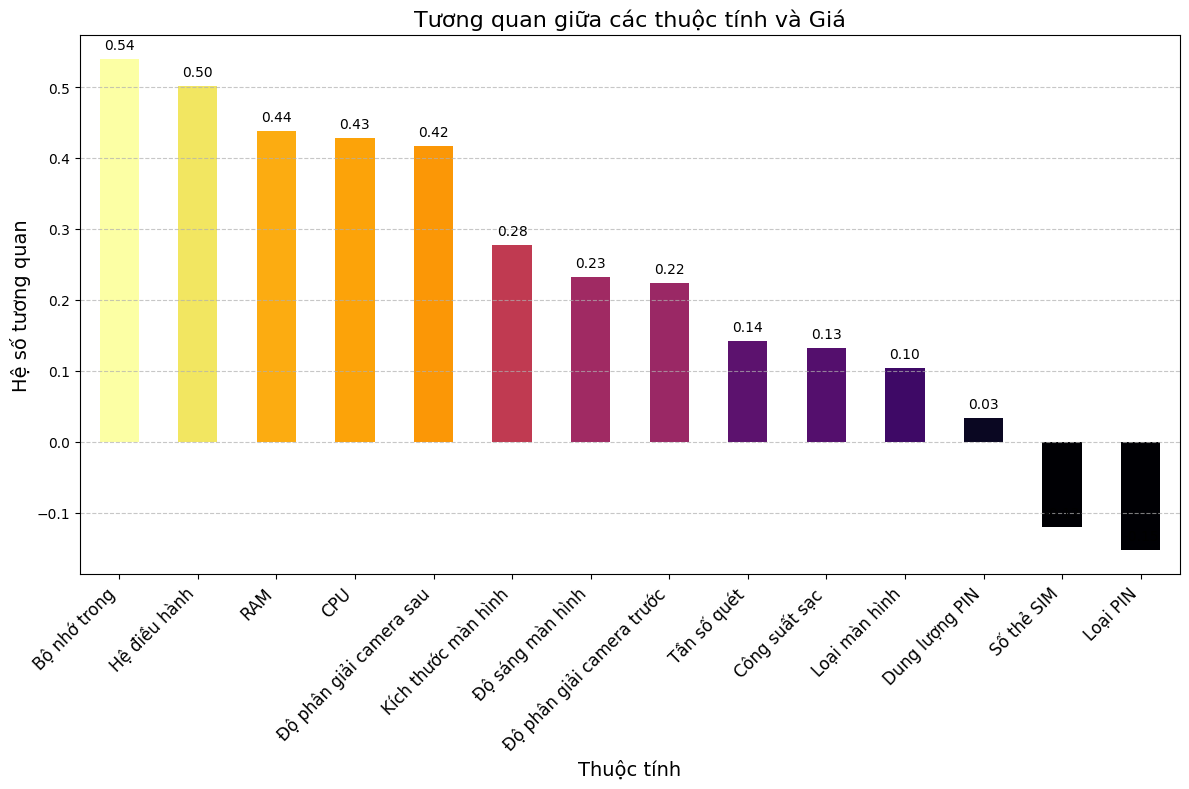

In [24]:
# Tính tươmg quan giữa các thuộc tính và giá
correlation_with_price = data_copy.corr()['Giá'].sort_values(ascending=False)
correlation_data = correlation_with_price[1:].reset_index()
correlation_data.columns = ['Thuộc tính', 'Tương quan']

# Vẽ biểu đồ cột
plt.figure(figsize=(12, 8))
bars = correlation_with_price[1:].plot(
    kind='bar', 
    color=plt.cm.inferno(correlation_with_price[1:].values / max(correlation_with_price[1:].values))
)

# Thêm giá trị trên cột
for bar in bars.patches:
    plt.text(
        bar.get_x() + bar.get_width() / 2, 
        bar.get_height() + 0.01, 
        f'{bar.get_height():.2f}', 
        ha='center', 
        va='bottom', 
        fontsize=10, 
        color='black'
    )

# Thêm tiêu đề và nhãn
plt.title("Tương quan giữa các thuộc tính và Giá", fontsize=16)
plt.xlabel("Thuộc tính", fontsize=14)
plt.ylabel("Hệ số tương quan", fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Hiển thị biểu đồ
plt.show()

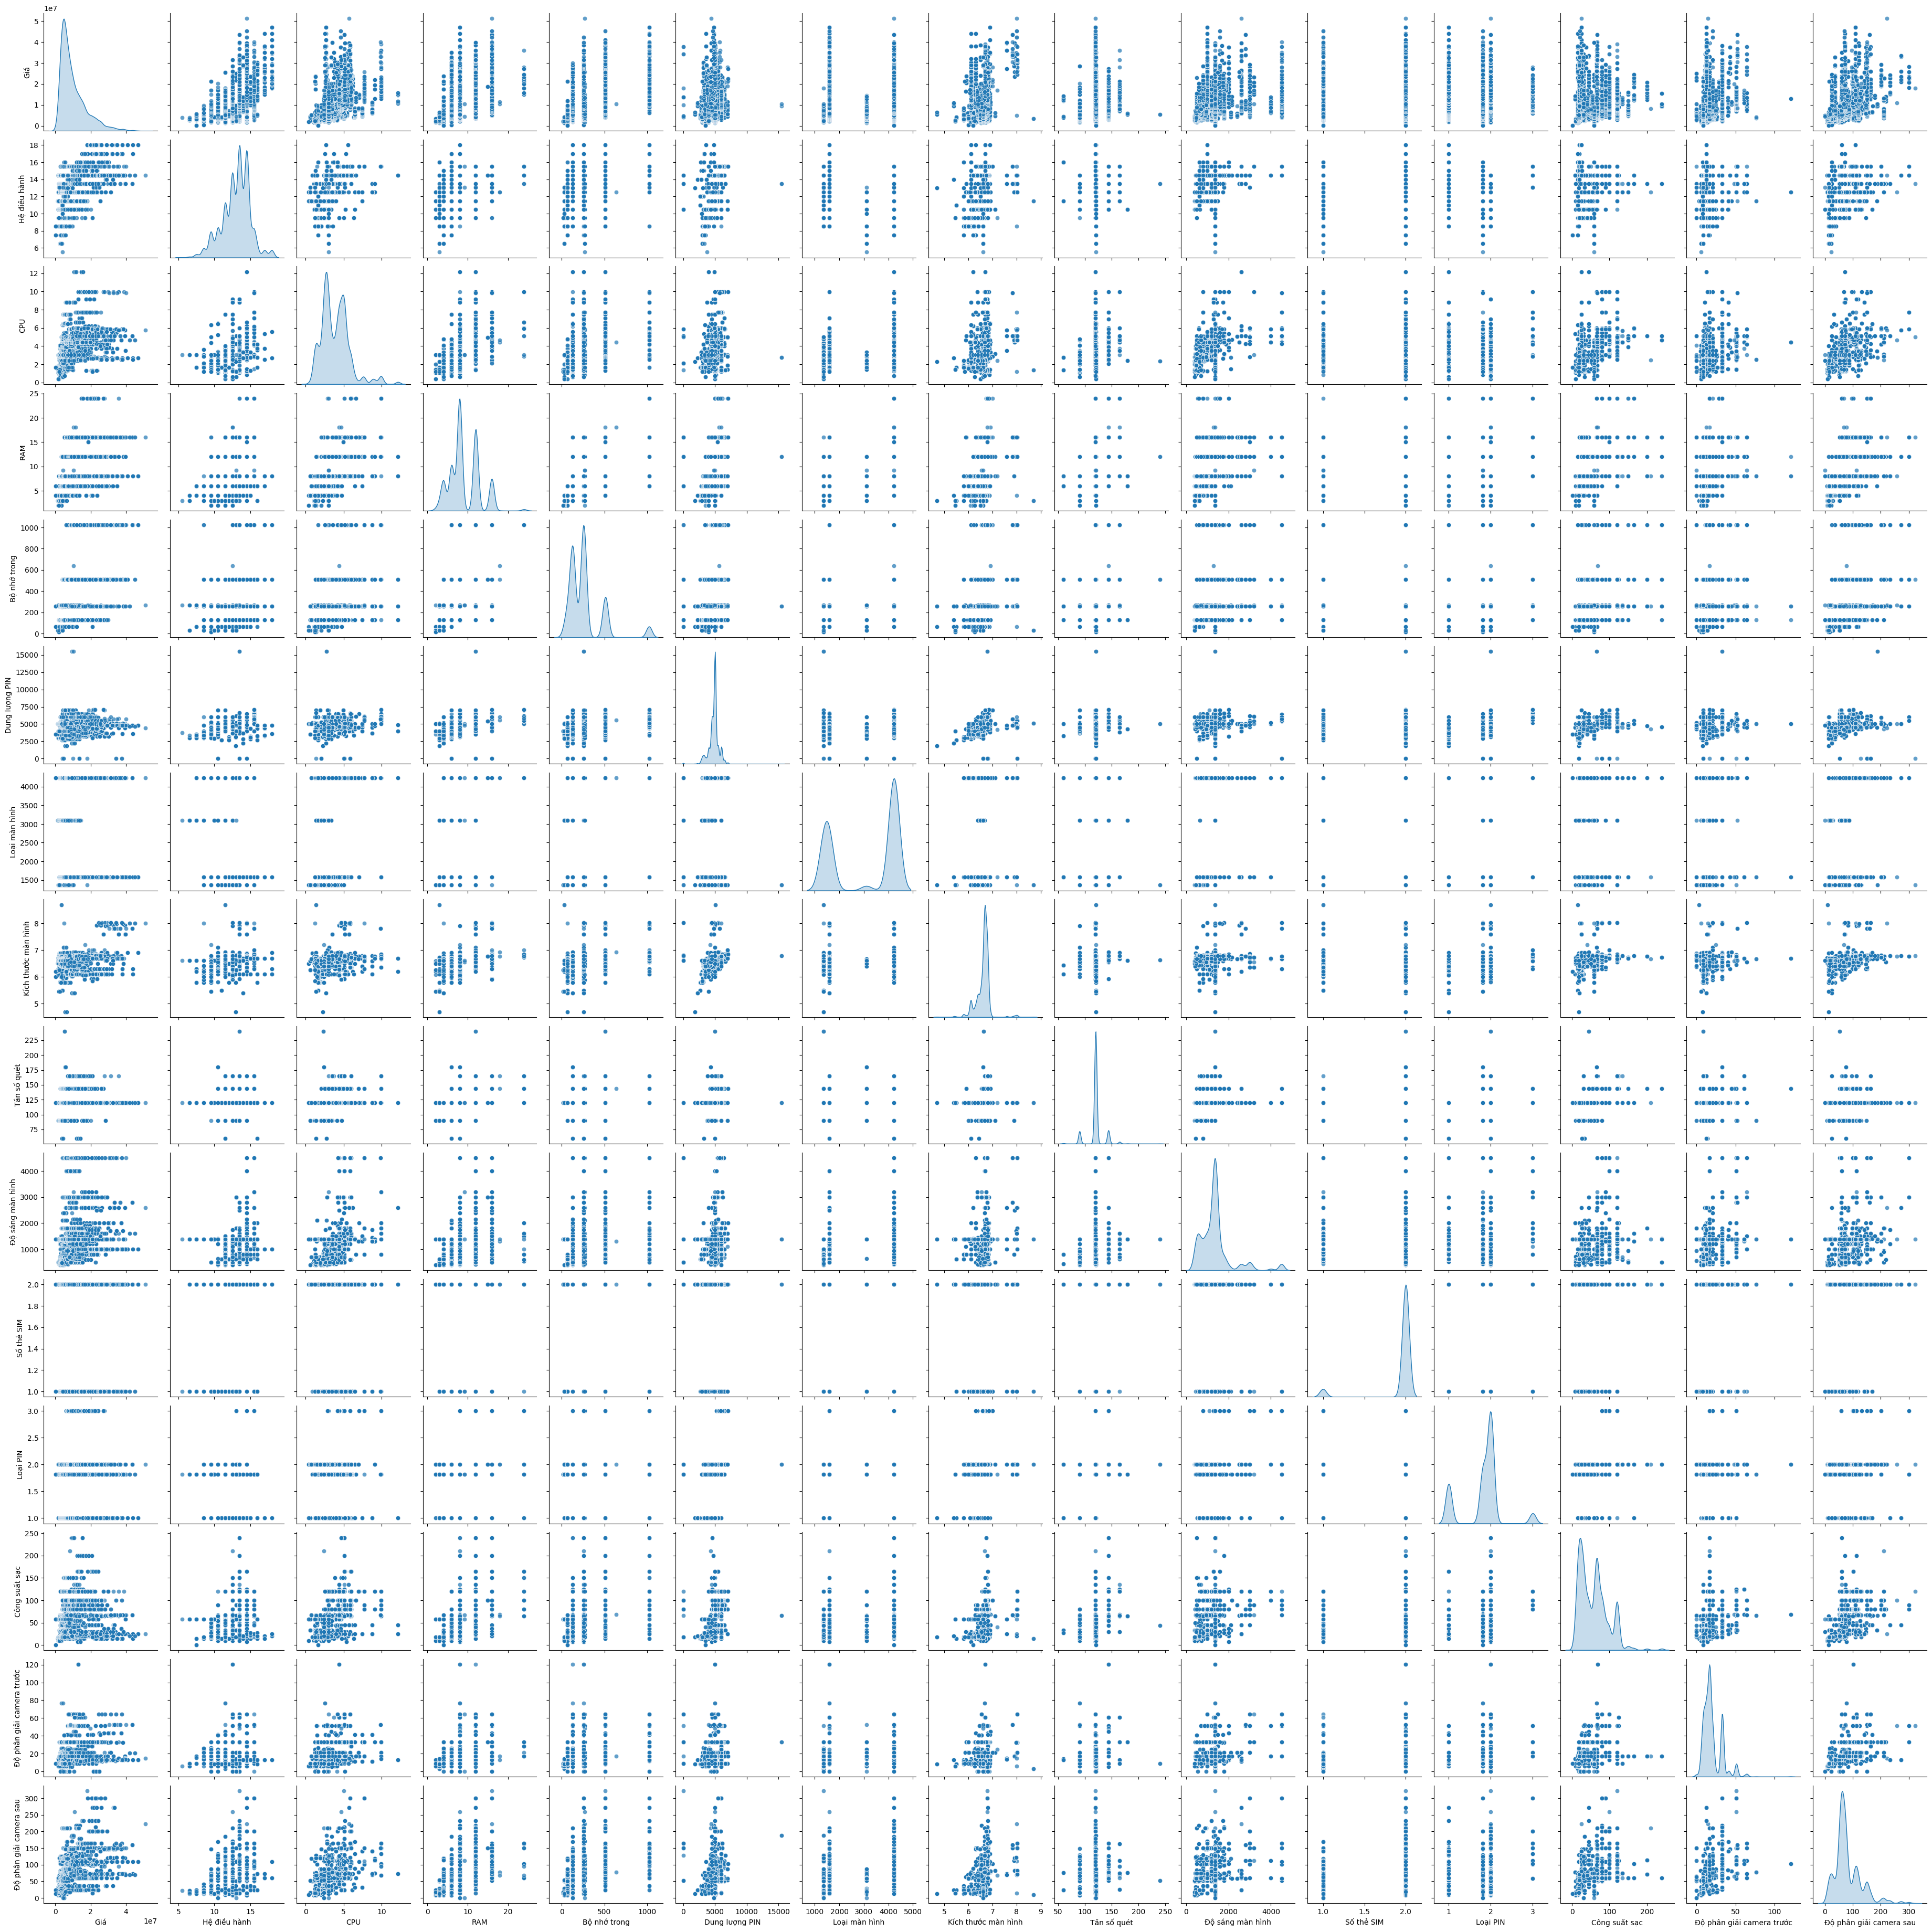

In [25]:
# Vẽ biểu đồ pairplot
sns.pairplot(data_copy, diag_kind='kde', plot_kws={'alpha': 0.7})
plt.show()

## Nhận xét

- **Bộ nhớ trong, Hệ điều hành, RAM, và CPU** là những thông số kỹ thuật có tương quan mạnh nhất với giá của một chiếc điện thoại.  

    - **Bộ nhớ trong**: Đáp ứng nhu cầu lưu trữ dữ liệu ngày càng lớn.  
    - **Hệ điều hành**: Ảnh hưởng bởi phiên bản và tối ưu hóa.  
    - **RAM**: Tăng khả năng xử lý đa nhiệm.  
    - **CPU**: Quyết định hiệu năng, đặc biệt ở dòng flagship.  

- **Độ phân giải camera sau và kích thước màn hình** có mức tương quan trung bình.  

   - **Camera sau**: Quan trọng với người dùng thích chụp ảnh.  
   - **Màn hình**: Kích thước lớn cải thiện trải nghiệm giải trí.

- **Các yếu tố khác như Công suất sạc, Loại màn hình, Tần số quét** có ảnh hưởng nhỏ hơn nhưng vẫn đáng kể.  
   - **Công suất sạc**: Tốc độ sạc nhanh ngày càng phổ biến.
   - **Loại màn hình và tần số quét**: Những yếu tố này quan trọng với các dòng điện thoại gaming hoặc giải trí cao cấp.

- **Dung lượng PIN, Số thẻ SIM, và Loại PIN** có tương quan thấp với giá.  
   - Các yếu tố này không có sự khác biệt quá lớn giữa các phân khúc giá.
   - **PIN** và **số thẻ SIM** có thể không phải yếu tố quyết định giá điện thoại, hoặc do dữ liệu chưa đủ ý nghĩa hoặc lỗi xử lý dẫn đến phân tích chưa chính xác.

### Kết luận:
Những thông số ảnh hưởng mạnh nhất đến giá của một chiếc điện thoại là **Bộ nhớ trong, Hệ điều hành, RAM, và CPU**. Các yếu tố khác như **camera và màn hình** cũng đóng vai trò bổ trợ.

# Câu hỏi: Kiểu thiết kế điện thoại nào phổ biến nhất hiện nay, dựa trên các kiểu thiết kế của các mẫu điện thoại hiện có trong cửa hàng?

## Mục đích

**Lý do:** Các mẫu thiết kế xuất hiện phổ biến trên các điện thoại phần nào phản ánh được thị hiếu và nhu cầu của người mua. Theo quy luật cung - cầu, việc phân tích các mẫu thiết kế thịnh hành mang lại nhiều giá trị và ý nghĩa thực tiễn.

**Mục đích chính:**
- **Đối với nhà sản xuất**: Hiểu được các kiểu thiết kế điện thoại nào đang được ưa chuộng, từ đó tối ưu hóa dây chuyền sản xuất và tập trung phát triển các sản phẩm phù hợp với thị hiếu thị trường.  
- **Đối với người tiêu dùng**: Cung cấp thông tin về các kiểu thiết kế phổ biến, giúp họ lựa chọn sản phẩm đáp ứng nhu cầu cá nhân và bắt kịp xu hướng.  
- **Đối với các chủ cửa hàng**: Nắm bắt xu hướng thị trường để điều chỉnh kế hoạch nhập hàng, quản lý tồn kho hiệu quả và xây dựng chiến lược kinh doanh phù hợp.  
- **Đối với các bên khác**: Như nhà nghiên cứu thị trường, nhà đầu tư – thông tin này hỗ trợ việc phân tích xu hướng tiêu dùng, xây dựng chiến lược tiếp thị và đưa ra quyết định đầu tư chính xác.  

## Tiền xử lý

In [26]:
# Tạo ra một DataFrame mới chứa các thuộc tính 'Thiết kế'
design_df = pd.DataFrame({'Thiết kế': data['thiet_ke'].astype(str).copy()})

# Xử lý cột 'Thiết kế'
design_df['Thiết kế'] = design_df['Thiết kế'].dropna().str.replace(' + ', ', ', regex=False)
design_df['Thiết kế'] = design_df['Thiết kế'].str.replace('\r\n', ', ').str.replace('\n', ', ').str.split(', ')
design_df['Thiết kế'] = design_df['Thiết kế'].apply(lambda x: [i.lower() for i in x])
design_df['Thiết kế'] = design_df['Thiết kế'].apply(lambda x: [i.strip() for i in x])

n = design_df.explode('Thiết kế')['Thiết kế'].value_counts()

print(n)

Thiết kế
kháng nước                                                  2522
cảm ứng                                                     2466
thanh                                                       2343
bụi ip68                                                    1068
khung kim loại                                               871
khung nhựa                                                   771
khung nhựa vuông vức                                         768
mặt lưng nhựa                                                660
khung nhôm                                                   572
cảm biến vân tay dưới màn hình                               522
2 mặt kính                                                   463
mặt lưng kính                                                400
màn hình cong                                                386
khung nhôm vuông vức                                         373
cảm biến vân tay trong màn hình                              365
cảm biến vân tay

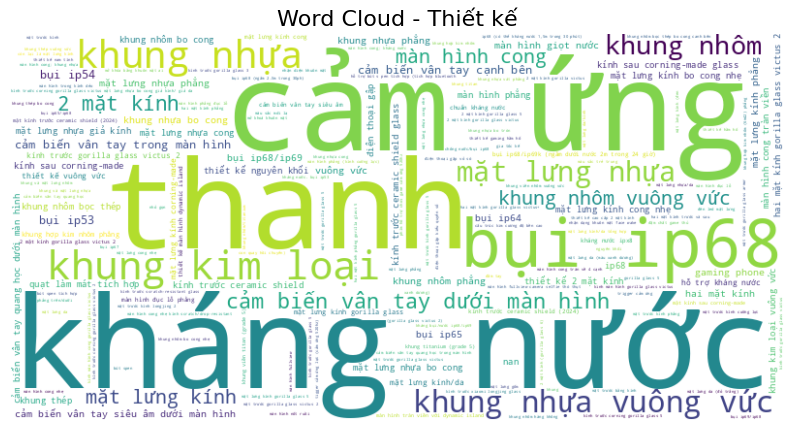

In [27]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Tạo Word Cloud từ biến n
wordcloud = WordCloud(
    width=800,
    height=400,
    background_color='white',
    colormap='viridis'
).generate_from_frequencies(n)

# Hiển thị Word Cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Tắt trục
plt.title("Word Cloud - Thiết kế", fontsize=16)
plt.show()

## Phân tích và trực quan hóa

## Nhận xét

- **Vật liệu phổ biến:** Nhựa và nhôm được sử dụng nhiều trong khung thiết kế (khung nhựa, khung nhôm), kết hợp với kính chịu lực cao (2 mặt kính, mặt lưng kính) để tăng độ bền và tính thẩm mỹ.  
- **Tính năng bền bỉ:** Các thiết kế thường chú trọng khả năng kháng nước, kháng bụi (ip68, ip53), phù hợp với điều kiện sử dụng khắc nghiệt.  
- **Thiết kế hiện đại:** Mặt lưng kính, màn hình cong, và các chi tiết bo cong hoặc vuông vức tạo sự cân đối, vừa mang tính thời trang vừa đảm bảo trải nghiệm cầm nắm thoải mái.  
- **Công nghệ tích hợp:** Cảm ứng và cảm biến vân tay (trong màn hình, cạnh bên, siêu âm) được tích hợp, nhấn mạnh tính tiện lợi và hiện đại trong sử dụng.  

=> Thiết kế tập trung vào sự kết hợp giữa tính năng bền vững, vật liệu cao cấp và công nghệ hiện đại, đáp ứng cả nhu cầu thẩm mỹ lẫn sử dụng thực tế.

# Câu hỏi: Hãng điện thoại có ảnh hưởng đến giá cả không?

## Mục đích

- Giúp xác định vị trí của các thương hiệu trên thị trường 

- Phần nào xác định được chiến lược của thương hiệu trên thị trường (nhắm tới tới khách hàng có thu nhập thấp hay thu nhập cao trong xẫ hội)

## Tiền xử lý

In [28]:
#Không lấy những điện thoại cũ
data_new = data[~data['ten'].str.contains('cũ', na=False)]
df = data_new[["hang_dien_thoai", "gia_moi"]].copy().dropna()
df = df.groupby("hang_dien_thoai").agg(['mean', 'count']).sort_values(('gia_moi', 'mean'), ascending=False).reset_index()
df.columns = ['hang_dien_thoai','mean', 'count']
df = df[df['count']>10]
df

,hang_dien_thoai,mean,count
1,iPhone,2.416848e+07,275
2,NIO,2.326567e+07,21
3,Google,2.047551e+07,118
5,Asus,1.705028e+07,94
6,Honor,1.542390e+07,145
7,ZTE,1.518667e+07,102
8,Sony,1.400006e+07,81
9,Oppo,1.270634e+07,367
10,Nubia,1.248492e+07,130
11,Meizu,1.230574e+07,61


## Trực quan hóa

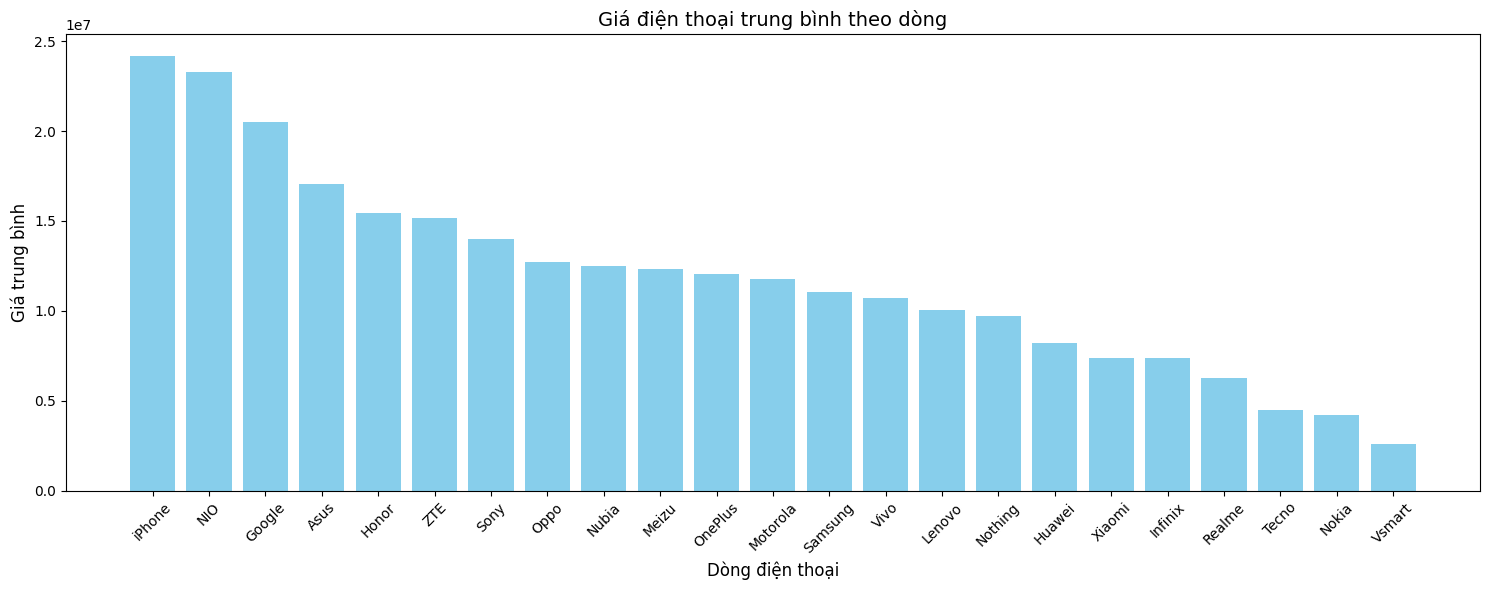

In [29]:
# Plotting the bar chart
plt.figure(figsize=(15, 6))
plt.bar(df["hang_dien_thoai"], df["mean"], color='skyblue')
plt.title("Giá điện thoại trung bình theo dòng", fontsize=14)
plt.xlabel("Dòng điện thoại", fontsize=12)
plt.ylabel("Giá trung bình", fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.tight_layout()
plt.show()

## Nhận xét

- Điện thoaị khác nhau có liên quan mật thiết tới giá cả, điều này cho thấy có sự phân khúc về giá điện thoại của các hãng trên thị trường tùy thuộc vào nhóm đối tượng khách hàng mà hãng đó hường tới:

    + iPhone ưu tiên hướng tới những khách hàng có thu nhập khá cao. Điều này dễ hiểu khi họ được xem là hãng điện thoại đi trước thời đại, mang những công nghệ hiện đại nhất vào chiếc điện thoại của mình. Bên cạnh iPhone thì Google và NIO cũng có giá trung bình rất cao (ở mức hơn 20 triệu)

    + Phần lớn hãng điện thoại sẽ hướng đến giá tầm trung, phù hợp hơn với người lao động thông thường, đây là nơi mà số lượng khách hàng tiềm năng tập trung chủ yếu. Một số hãng tiêu biểu: Samsung, Oppo, Vivo, Huawei

    + Số ít các hãng lựa chọn sẽ hướng đến khách hàng của mình là người có thu nhập thấp. Ví dụ Realme, Nokia, Vsmart